In [2]:

import numpy as np
from matplotlib import pyplot as plt
from dataclasses import dataclass
from echospec.utils.parameters import Parameters
from echospec.experiments.spectroscopy_vs_amplitude import AmplitudeSweepSpectroscopy, OptionsSpectroscopy2d
from echospec.utils.units import Units as u

from echospec.simulation.torry import find_fwhm_vec_vs_rabi

Amplitude sweep:   0%|          | 0/31 [00:00<?, ?Ω/s]

Amplitude sweep:   0%|          | 0/31 [00:00<?, ?Ω/s]

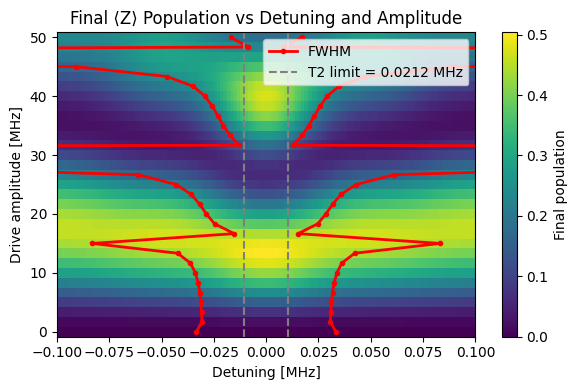

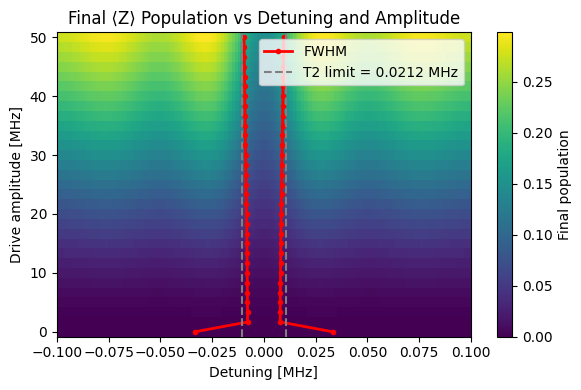

In [9]:
options = OptionsSpectroscopy2d(plot=True)
options.num_time_points = 5000
params = Parameters()


detunings = np.linspace(-0.1, 0.1, 151)*2*np.pi*u.MHz
amplitudes = np.linspace(0, 50, 31)*2*np.pi*u.MHz

params.eco_pulse = False
spectroscopy = AmplitudeSweepSpectroscopy(
    amplitudes=amplitudes,
    detunings=detunings,
    params=params,
    options=options
)

results = spectroscopy.run()

params.eco_pulse = True
spectroscopy_echo = AmplitudeSweepSpectroscopy(
    amplitudes=amplitudes,
    detunings=detunings,
    params=params,
    options=options
)

results_echo = spectroscopy_echo.run()




/var/folders/5l/mx_yndbx4sq978lx9ht2346r0000gn/T/ipykernel_38485/133934797.py:45: RuntimeWarning: divide by zero encountered in divide
  ax[1].plot(amplitudes / (2 * np.pi * u.MHz), fwhm_values_1/
/var/folders/5l/mx_yndbx4sq978lx9ht2346r0000gn/T/ipykernel_38485/133934797.py:47: RuntimeWarning: divide by zero encountered in divide
  ax[1].plot(amplitudes / (2 * np.pi * u.MHz), fwhm_values_2/


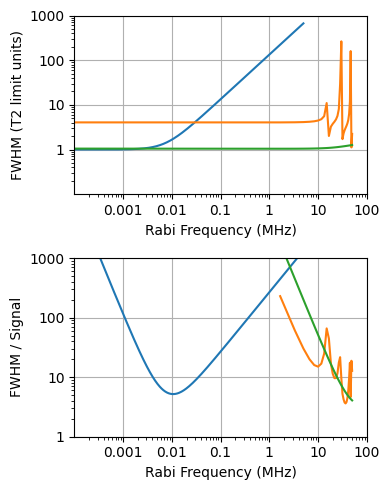

In [26]:
fig, ax = plt.subplots(2, 1, figsize=(4, 5))


ws, fwhms, snrs = find_fwhm_vec_vs_rabi(
    T1=params.T1,
    T2=params.T2,
)

T1 = params.T1
T2 = params.T2

T2_limit = params.T2_limit


fwhm_values_1 = spectroscopy.fwhm_values / (2 * np.pi * u.MHz)
snr_values_1 = spectroscopy.snr_values

fwhm_values_2 = spectroscopy_echo.fwhm_values / (2 * np.pi * u.MHz)
snr_values_2 = spectroscopy_echo.snr_values



ax[0].plot(ws / (2 * np.pi * u.MHz), fwhms / T2_limit, '-')
ax[0].plot(amplitudes / (2 * np.pi * u.MHz),
           fwhm_values_1/T2_limit*1e6*1.4, marker='')
ax[0].plot(amplitudes / (2 * np.pi * u.MHz),
           fwhm_values_2/T2_limit*1e6*1.4, marker='')
ax[0].set_xlabel('Rabi Frequency (MHz)')

ax[0].set_ylabel('FWHM (T2 limit units)')
ax[0].set_xscale('log')
ax[0].set_yscale('log')
ax[0].set_ylim(1e-1, 1e3)
ax[0].set_xlim(1e-4, 1e2)
ax[0].set_xticks([1e-3, 1e-2, 1e-1, 1, 10, 100])
ax[0].set_xticklabels(['0.001', '0.01', '0.1', '1', '10', '100'])

ax[0].set_yticks([1, 10, 100, 1000])
ax[0].set_yticklabels(['1', '10', '100', '1000'])

ax[0].grid(True)


ax[1].plot(ws / (2 * np.pi * u.MHz), fwhms/T2_limit/snrs, marker='')
ax[1].plot(amplitudes / (2 * np.pi * u.MHz), fwhm_values_1/
           T2_limit/snr_values_1*1e6*1.4, marker='')
ax[1].plot(amplitudes / (2 * np.pi * u.MHz), fwhm_values_2/
           T2_limit/snr_values_2*1e6*1.4, marker='')
ax[1].set_xscale('log')
ax[1].set_yscale('log')
ax[1].set_xlabel('Rabi Frequency (MHz)')
ax[1].set_ylabel('FWHM / Signal')
ax[1].set_ylim(1e0, 1e3)
ax[1].set_xlim(1e-4, 1e2)
ax[1].set_xticks([1e-3, 1e-2, 1e-1, 1, 10, 100])
ax[1].set_xticklabels(['0.001', '0.01', '0.1', '1', '10', '100'])

ax[1].set_yticks([1, 10, 100, 1000])
ax[1].set_yticklabels(['1', '10', '100', '1000'])
ax[1].grid(True)

plt.tight_layout()

# plt.savefig('fwhm_vs_rabi.png', dpi=300)